<center>

## <span style="font-size: 35px; font-weight: bold;">¿Quién recibirá el próximo crédito azul": Introduciendo BLUE LOAN AI  </span>
    
</center>

## Tabla de contenidos

*[1.INTRODUCCIÓN](#1)<br />
*[2.OBJETIVO](#2)<br />
*[3. METODOLOGÍA](#2)<br />
*[4. PRE-PROCESAMIENTO DE DATOS](#4)<br />
*[3.1 Conclusiones Intermedias Pre-Procesamiento de Datos](#4.1)<br />
*[5. MODELACIÓN](#5)<br />
*[5.1 Conclusiones Intermedias Modelación](#5.1)<br />
*[6. CONCLUSIONES FINALES Y LIMITACIONES](#5)<br />
*[6.1 Conclusiones finales](#6.1)<br />
*[6.2 Limitaciones](#6.2)<br />

## 1. INTRODUCCIÓN <a class="anchor" id="1"></a>

**Descripción:** Blue Loan AI es una plataforma de inteligencia artificial diseñada para ayudar a las instituciones financieras a evaluar y gestionar préstamos azules. En su versión MVP, identifica empresas prospectos para la colocación de estos préstamos. 

**Impacto del proyecto**: BlueLoan AI promueve la asignación de préstamos azules a empresas del sector de acuicultura en Ecuador. Al dirigir capital hacia estas iniciativas, la plataforma acelera la transición hacia una economía baja en carbono.

## 2. OBJETIVO <a class="anchor" id="2"></a>

Identificar prospectos de empresas del sector de acuicultura del Ecuador con potencial de recibir préstamos azules.

## 3. METODOLOGÍA <a class="anchor" id="3"></a>

**1.- Integración de Datos:** Análsis de la base de datos datos de la SuperIntendencia de Compañías de Ecuador. Debido a la falta de base de datos ambientales empresariales, estos datos (económico-financieros) se utilizarán como “proxy” de la capacidad de la empresa de gestionar proyectos ambientales.

**2.- Modelo de Machine Learning:** Utiliza el algoritmo “K neareast Neighbors” para identificar compañías similares (vecinas en el espacio vectorial) a aquellas que ya han recibido una acreditción del Aquaculture Stwewarshiop Council (ASC)”. Se utilizan estos datos como un segundo “proxy”, de la capacidad de la empresa de gestionar proyectos ambientales. 

**3.- Dashboard interactivo:** La plataforma incluirá un dashboard interactivo para visualizar los resultados del modelo. 

## 4. PRE-PROCESAMIENTO DE DATOS <a id="4"></a>

De acuerdo a la metodología planteada, para este MVP vamos a necesitar dos bases de datos:

1.- Registros de la Superintendencia de Compañías de Ecuador.  
2.- Empresas de Ecuador que han obtenido una certificación con el "Aquaculture Stewarship Council" (ASC).

Los datos de la Superintendencia de Compañias de Ecuador fueron descargados de la página: https://appscvsmovil.supercias.gob.ec/ranking/reporte.html. Los datos corresponden a los registros del año 2023. 

En cuanto a los datos de las empresas del ASC, los mismos se obtuvieron de su página web: https://asc-aqua.org/

In [1]:
# Importa librerías
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga los datos del proyecto

ciuu = pd.read_csv("Datos/bi_ciiu.csv")
compania = pd.read_csv("Datos/bi_compania.csv") 
ranking = pd.read_csv("Datos/bi_ranking.csv", low_memory=False) 
segmento = pd.read_csv("Datos/bi_segmento.csv")
companias_certificadas_asc = pd.read_excel('Datos/companias_asc.xlsx')
#companias_certificadas_asc = pd.read_csv("Datos/companias_asc.csv")

In [3]:
ciuu.head(5)

,ciiu,descripcion
0,A,"AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA."
1,A01,"AGRICULTURA, GANADERÍA, CAZA Y ACTIVIDADES DE ..."
2,A011,CULTIVO DE PLANTAS NO PERENNES.
3,A0111,"CULTIVO DE CEREALES (EXCEPTO ARROZ), LEGUMBRES..."
4,A0111.1,CULTIVO DE CEREALES.


In [4]:
compania.head(15)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6
0,1,1790013731001,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,ANÓNIMA ...,23,SANTO DOMINGO DE LOS TSACHILAS ...,NaN
1,2,1790004724001,ACERIA DEL ECUADOR CA ADELCA.,ANÓNIMA ...,17,PICHINCHA ...,NaN
2,3,1790008959001,ACERO COMERCIAL ECUATORIANO S.A.,ANÓNIMA ...,17,PICHINCHA ...,NaN
3,4,1700000000005,ACROPOLIS SA NEGOCIOS,ANÓNIMA ...,17,PICHINCHA ...,NaN
4,6,1790006476001,AERO TAXIS ECUATORIANOS SA ATESA,ANÓNIMA ...,17,PICHINCHA ...,NaN
5,9,1790050513001,AEROSOL DEL ECUADOR SA,ANÓNIMA ...,17,PICHINCHA ...,NaN
6,10,1700000000020,AEROVIAS ECUATORIANAS C LTDA AREA,RESPONSABILIDAD LIMITADA ...,17,PICHINCHA ...,NaN
7,11,1790044149001,AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,SUCURSAL EXTRANJERA ...,17,PICHINCHA ...,NaN
8,13,0891706928001,AGENCIA COMERCIAL AZUAYA SA ACASA,ANÓNIMA ...,1,AZUAY ...,NaN
9,14,1700000000023,AGENCIA GENERAL DE SUMINISTROS SA AGDES,ANÓNIMA ...,17,PICHINCHA ...,NaN


In [5]:
compania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286869 entries, 0 to 286868
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   expediente  286869 non-null  int64 
 1   ruc         286869 non-null  object
 2   nombre      286869 non-null  object
 3   tipo        286869 non-null  object
 4   pro_codigo  286869 non-null  object
 5   provincia   286869 non-null  object
 6   Unnamed: 6  6 non-null       object
dtypes: int64(1), object(6)
memory usage: 15.3+ MB


In [6]:
compania.shape

(286869, 7)

In [7]:
ranking.head(5)

,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
0,2008,1,25463.0,0,16.0,0.000000e+00,1.386558e+05,63242.19,0.00,18563.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,2,26.0,0,33.0,2.808959e+08,2.225880e+08,80289210.56,17629196.77,4980263.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,3,784.0,0,50.0,1.564886e+07,1.368537e+07,5597302.36,912111.72,269188.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,6,16538.0,0,67.0,0.000000e+00,6.248392e+05,-73907.76,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,11,410.0,0,89.0,4.968394e+07,2.397747e+06,-1122362.23,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464271 entries, 0 to 1464270
Data columns (total 54 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   anio                       1464271 non-null  int64  
 1   expediente                 1464271 non-null  int64  
 2   posicion_general           1027846 non-null  float64
 3   cia_imvalores              1464271 non-null  int64  
 4   id_estado_financiero       1027846 non-null  float64
 5   ingresos_ventas            1464271 non-null  float64
 6   activos                    1464271 non-null  float64
 7   patrimonio                 1464271 non-null  float64
 8   utilidad_an_imp            1464271 non-null  float64
 9   impuesto_renta             1464271 non-null  float64
 10  n_empleados                1464271 non-null  float64
 11  ingresos_totales           1181781 non-null  float64
 12  utilidad_ejercicio         1181781 non-null  float64
 13  utilidad_net

In [9]:
ranking["anio"].unique()

array([2008, 2022, 2009, 2021, 2020, 2019, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2023])

In [10]:
ranking.shape

(1464271, 54)

In [11]:
ranking.columns.values.tolist()

['anio',
 'expediente',
 'posicion_general',
 'cia_imvalores',
 'id_estado_financiero',
 'ingresos_ventas',
 'activos',
 'patrimonio',
 'utilidad_an_imp',
 'impuesto_renta',
 'n_empleados',
 'ingresos_totales',
 'utilidad_ejercicio',
 'utilidad_neta',
 'cod_segmento',
 'ciiu_n1',
 'ciiu_n6',
 'liquidez_corriente',
 'prueba_acida',
 'end_activo',
 'end_patrimonial',
 'end_activo_fijo',
 'end_corto_plazo',
 'end_largo_plazo',
 'cobertura_interes',
 'apalancamiento',
 'apalancamiento_financiero',
 'end_patrimonial_ct',
 'end_patrimonial_nct',
 'apalancamiento_c_l_plazo',
 'rot_cartera',
 'rot_activo_fijo',
 'rot_ventas',
 'per_med_cobranza',
 'per_med_pago',
 'impac_gasto_a_v',
 'impac_carga_finan',
 'rent_neta_activo',
 'margen_bruto',
 'margen_operacional',
 'rent_neta_ventas',
 'rent_ope_patrimonio',
 'rent_ope_activo',
 'roe',
 'roa',
 'fortaleza_patrimonial',
 'gastos_financieros',
 'gastos_admin_ventas',
 'depreciaciones',
 'amortizaciones',
 'costos_ventas_prod',
 'deuda_total',
 '

In [12]:
ranking["liquidez_corriente"].describe()

count    6.774950e+05
mean     2.321555e+02
std      5.739898e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.400000e+00
max      2.803542e+07
Name: liquidez_corriente, dtype: float64

In [13]:
liquidez_corriente = ranking[ranking["liquidez_corriente"]>1]
len(liquidez_corriente)

226787

In [14]:
ranking["cobertura_interes"].describe()

count    4.572260e+05
mean    -2.615291e+06
std      1.768899e+09
min     -1.196103e+12
25%      0.000000e+00
50%      0.000000e+00
75%      1.340000e+00
max      7.120201e+07
Name: cobertura_interes, dtype: float64

In [15]:
cobertura_interes = ranking[ranking["cobertura_interes"]>1]
len(cobertura_interes)

118181

In [16]:
ranking["end_patrimonial"].describe()

count    677495.000000
mean         15.696969
std        1054.467506
min        -678.900000
25%           0.000000
50%           0.000000
75%           1.570000
max      670655.790000
Name: end_patrimonial, dtype: float64

In [17]:
end_patrimonial = ranking[ranking["end_patrimonial"]>1]
len(end_patrimonial)

206235

In [18]:
ranking["margen_bruto"].describe()

count    4.572380e+05
mean    -1.587855e+03
std      9.811157e+05
min     -6.628143e+08
25%      0.000000e+00
50%      7.000000e-02
75%      1.000000e+00
max      1.206190e+03
Name: margen_bruto, dtype: float64

In [19]:
margen_bruto = ranking[ranking["margen_bruto"]>=1]
len(margen_bruto)

126572

In [20]:
segmento.head(5)

,id_segmento,segmento
0,1,MICROEMPRESA
1,2,PEQUEÑA
2,3,MEDIANA
3,4,GRANDE
4,0,NO DEFINIDO


In [21]:
segmento.shape

(5, 2)

In [22]:
companias_certificadas_asc['ruc'] = companias_certificadas_asc['ruc'].astype(str)

In [23]:
companias_certificadas_asc.head(5)

,ruc,nombre_compania,certificada
0,990900418001,AQUACULTURA PUROCONGO S.A.,1
1,1390150233001,DIVACCI S.A.,1
2,990976139001,MASI S.A.,1
3,992766107001,JELEBRAT S.A.,1
4,1391791488001,GRUPO DEGFER CIA. LTDA.,1


In [24]:
companias_certificadas_asc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ruc              29 non-null     object
 1   nombre_compania  29 non-null     object
 2   certificada      29 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 824.0+ bytes


In [25]:
# Agrega ceros a los datos de ruc

companias_certificadas_asc['ruc'] = companias_certificadas_asc['ruc'].apply(lambda x: '0' + x if x[0] != '1' else x)
companias_certificadas_asc.head(5)

,ruc,nombre_compania,certificada
0,0990900418001,AQUACULTURA PUROCONGO S.A.,1
1,1390150233001,DIVACCI S.A.,1
2,0990976139001,MASI S.A.,1
3,0992766107001,JELEBRAT S.A.,1
4,1391791488001,GRUPO DEGFER CIA. LTDA.,1


In [26]:
companias_certificadas_asc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ruc              29 non-null     object
 1   nombre_compania  29 non-null     object
 2   certificada      29 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 824.0+ bytes


Necesitamos una base de datos consolidada. Por lo tanto, vamos a realizar dos operaciones "join": 

1) Entre la base de datos "compania" y "companias_certificadas_asc" basado en en el número de RUC.  <br> 
2) Entre la base de datos "ranking" y "compania" basado en el número de expediente.

En base un primer "join" se aprecia que solo existen dos empresas en la base de datos "companias" que coinciden por núnero de ruc (verificado por el SRI) con los datos del ASC.

En ese sentido, no nos conviene el "left join", sino un "outer join" que una todos los datos. Posteriromente, podemos eliminar los duplciados. 

In [27]:
# Join no. 1

datos_companias_join_1 = pd.merge(compania,companias_certificadas_asc, on = "ruc", how='outer')
datos_companias_join_1.head(5)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada
0,1,1790013731001,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,ANÓNIMA ...,23,SANTO DOMINGO DE LOS TSACHILAS ...,NaN,NaN,NaN
1,2,1790004724001,ACERIA DEL ECUADOR CA ADELCA.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN
2,3,1790008959001,ACERO COMERCIAL ECUATORIANO S.A.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN
3,4,1700000000005,ACROPOLIS SA NEGOCIOS,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN
4,6,1790006476001,AERO TAXIS ECUATORIANOS SA ATESA,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN


In [28]:
datos_companias_join_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286869 entries, 0 to 286868
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   expediente       286869 non-null  int64  
 1   ruc              286869 non-null  object 
 2   nombre           286869 non-null  object 
 3   tipo             286869 non-null  object 
 4   pro_codigo       286869 non-null  object 
 5   provincia        286869 non-null  object 
 6   Unnamed: 6       6 non-null       object 
 7   nombre_compania  29 non-null      object 
 8   certificada      29 non-null      float64
dtypes: float64(1), int64(1), object(7)
memory usage: 21.9+ MB


In [29]:
ruc = companias_certificadas_asc['ruc']
filtro_por_ruc_base_companias = datos_companias_join_1[datos_companias_join_1['ruc'].isin(ruc)]
filtro_por_ruc_base_companias

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada
4098,2151,0990033110001,SOCIEDAD NACIONAL DE GALAPAGOS CA,ANÓNIMA ...,9,GUAYAS ...,NaN,SOCIEDAD NACIONAL DE GALAPAGOS C.A.,1.0
7160,5274,0990171092001,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,1.0
16095,19679,0990553963001,PROMARISCO SA,ANÓNIMA ...,9,GUAYAS ...,NaN,PROMARISCO S.A.,1.0
16126,19709,0990555575001,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,ANÓNIMA ...,9,GUAYAS ...,NaN,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,1.0
16519,19119,0990488401001,CAMARONES ROLESA SA,ANÓNIMA ...,9,GUAYAS ...,NaN,CAMARONES ROLESA SA,1.0
19744,22576,0991257721001,INDUSTRIAL PESQUERA SANTA PRISCILA S.A.,ANÓNIMA ...,9,GUAYAS ...,NaN,INDUSTRIAL PESQUERA SANTA PRISCILA S.A.,1.0
21546,19880,0990576459001,PRODUMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,PRODUMAR S.A.,1.0
24969,23903,0790050487001,PESQUERA E INDUSTRIAL BRAVITO S.A,ANÓNIMA ...,7,EL ORO ...,NaN,PESQUERA E INDUSTRIAL BRAVITO S A,1.0
29257,34512,1390150233001,DIVACCI S.A.,ANÓNIMA ...,13,MANABI ...,NaN,DIVACCI S.A.,1.0
36855,41042,0990666253001,EXPORTADORA LANGOSMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,EXPORTADORA LANGOSMAR S.A.,1.0


In [30]:
filtro_por_ruc_base_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 4098 to 217158
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   expediente       29 non-null     int64  
 1   ruc              29 non-null     object 
 2   nombre           29 non-null     object 
 3   tipo             29 non-null     object 
 4   pro_codigo       29 non-null     object 
 5   provincia        29 non-null     object 
 6   Unnamed: 6       0 non-null      object 
 7   nombre_compania  29 non-null     object 
 8   certificada      29 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ KB


Para esta modelación, se filtrarán los datos de las empresas de acuerdo a su código CIIU. En ese sentido, este MVP de "Blue Loan AI" utilizará solo los datos de empresas vinculadas a la acuicultura (CIIU: A032) puesto que solo contamos con datos objetivo ("target") de estos sectores (de empresas certificadas por la ASC). 

In [31]:
# Filtra los datos de la SuperCias para acuicultura

ranking["ciiu_n6"] = ranking['ciiu_n6'].fillna('')
ranking_ciiu_A0321_02 = ranking[ranking['ciiu_n6'].str.contains('A0321.02')]

ranking_ciiu_A0321_02.head(5)

,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
1202,2022,22576,3.0,0,2118572.0,1.412874e+09,1.274285e+09,7.549777e+08,1.301194e+08,7555992.54,...,0.09,0.14,12195114.92,3.244702e+08,3336243.20,0.0,9.803852e+08,1.092807e+08,3052743.55,3.451556e+08
1210,2022,40424,11.0,0,2163074.0,8.814401e+08,4.892768e+08,2.303004e+08,7.612128e+07,7047425.16,...,0.14,0.07,7783463.69,5.520314e+07,414516.96,0.0,7.293640e+08,8.809702e+07,0.00,6.319420e+07
1243,2022,20090,44.0,1,2162645.0,1.625736e+08,4.842615e+08,1.174399e+08,2.844883e+06,947801.86,...,0.00,0.76,11286870.93,1.152243e+07,63909.46,0.0,1.385312e+08,1.418868e+08,49260761.45,2.280930e+07
1288,2022,44102,89.0,0,2178145.0,2.090268e+08,2.102912e+08,9.261121e+07,3.349346e+07,2920642.04,...,0.12,0.16,3042514.87,6.104162e+07,67365.98,0.0,1.083984e+08,1.719313e+07,0.00,6.408413e+07
1307,2022,19679,108.0,1,2157208.0,2.372973e+08,1.561216e+08,4.471006e+07,3.230765e+06,1316604.19,...,0.01,0.76,6370771.29,1.973370e+07,2436690.14,0.0,1.824988e+08,1.993434e+07,16348871.22,5.078391e+07


In [32]:
ranking_ciiu_A0321_02["ciiu_n6"]

1202       A0321.02
1210       A0321.02
1243       A0321.02
1288       A0321.02
1307       A0321.02
             ...   
1463678    A0321.02
1463748    A0321.02
1463759    A0321.02
1463841    A0321.02
1463950    A0321.02
Name: ciiu_n6, Length: 17130, dtype: object

In [33]:
ranking_ciiu_A0321_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17130 entries, 1202 to 1463950
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   anio                       17130 non-null  int64  
 1   expediente                 17130 non-null  int64  
 2   posicion_general           13309 non-null  float64
 3   cia_imvalores              17130 non-null  int64  
 4   id_estado_financiero       13309 non-null  float64
 5   ingresos_ventas            17130 non-null  float64
 6   activos                    17130 non-null  float64
 7   patrimonio                 17130 non-null  float64
 8   utilidad_an_imp            17130 non-null  float64
 9   impuesto_renta             17130 non-null  float64
 10  n_empleados                17130 non-null  float64
 11  ingresos_totales           15191 non-null  float64
 12  utilidad_ejercicio         15191 non-null  float64
 13  utilidad_neta              15191 non-null

In [34]:
ranking_ciiu_A0321_02.describe()

,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
count,17130.000000,17130.000000,13309.000000,17130.000000,1.330900e+04,1.713000e+04,1.713000e+04,1.713000e+04,1.713000e+04,1.713000e+04,...,5821.000000,5821.000000,5.802000e+03,5.802000e+03,5.802000e+03,5.802000e+03,5.802000e+03,5.802000e+03,5.802000e+03,5.802000e+03
mean,2016.561821,203823.917630,25915.150800,0.003211,1.522647e+06,2.412680e+06,1.906321e+06,7.959024e+05,4.413021e+10,5.180689e+04,...,0.725162,26.274573,6.200208e+04,2.134472e+05,5.995504e+04,1.825856e+03,2.632875e+06,5.333163e+05,1.801235e+05,4.226187e+05
std,4.662158,236473.531581,22207.813404,0.056574,4.022982e+05,4.128532e+07,1.857800e+07,9.449922e+06,5.775832e+12,1.164928e+06,...,10.233301,1972.676153,6.415767e+05,4.509051e+06,5.954380e+05,3.588323e+04,2.436106e+07,4.907115e+06,2.088577e+06,5.201093e+06
min,2009.000000,712.000000,1.000000,0.000000,1.752400e+04,0.000000e+00,0.000000e+00,-2.316810e+07,-8.827049e+08,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.293093e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,2012.000000,43789.000000,9279.000000,0.000000,1.242097e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2017.000000,105721.000000,18574.000000,0.000000,1.554130e+06,0.000000e+00,4.884046e+04,3.290580e+03,0.000000e+00,0.000000e+00,...,0.040000,0.040000,3.682500e+01,8.317625e+03,0.000000e+00,0.000000e+00,1.027120e+05,0.000000e+00,0.000000e+00,4.453327e+04
75%,2021.000000,182700.000000,37256.000000,0.000000,1.828023e+06,6.408780e+05,6.551514e+05,1.807947e+05,8.573608e+03,3.904688e+03,...,0.740000,0.560000,4.418290e+03,5.240635e+04,2.464392e+04,0.000000e+00,8.060135e+05,3.998505e+04,1.657267e+03,1.925528e+05
max,2023.000000,754231.000000,106238.000000,1.000000,2.192966e+06,4.519276e+09,1.274285e+09,7.549777e+08,7.559503e+14,1.068924e+08,...,650.000000,150506.610000,2.333394e+07,3.244702e+08,3.340453e+07,2.184585e+06,9.803852e+08,1.520120e+08,8.104633e+07,3.451556e+08


In [35]:
 # Join no. 2
    
datos_companias = pd.merge(datos_companias_join_1, ranking_ciiu_A0321_02, on = "expediente", how='outer')
datos_companias = datos_companias.drop_duplicates(subset=['ruc'])
datos_companias.head(5)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada,anio,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
0,1,1790013731001,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,ANÓNIMA ...,23,SANTO DOMINGO DE LOS TSACHILAS ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1790004724001,ACERIA DEL ECUADOR CA ADELCA.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1790008959001,ACERO COMERCIAL ECUATORIANO S.A.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1700000000005,ACROPOLIS SA NEGOCIOS,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1790006476001,AERO TAXIS ECUATORIANOS SA ATESA,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286646 entries, 0 to 300861
Data columns (total 62 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   expediente                 286646 non-null  int64  
 1   ruc                        286645 non-null  object 
 2   nombre                     286645 non-null  object 
 3   tipo                       286645 non-null  object 
 4   pro_codigo                 286645 non-null  object 
 5   provincia                  286645 non-null  object 
 6   Unnamed: 6                 6 non-null       object 
 7   nombre_compania            29 non-null      object 
 8   certificada                29 non-null      float64
 9   anio                       3002 non-null    float64
 10  posicion_general           1726 non-null    float64
 11  cia_imvalores              3002 non-null    float64
 12  id_estado_financiero       1726 non-null    float64
 13  ingresos_ventas            30

In [37]:
filtro_por_ruc_base_companias = datos_companias[datos_companias['ruc'].isin(ruc)]
filtro_por_ruc_base_companias.head(5)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada,anio,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
4119,2151,0990033110001,SOCIEDAD NACIONAL DE GALAPAGOS CA,ANÓNIMA ...,9,GUAYAS ...,NaN,SOCIEDAD NACIONAL DE GALAPAGOS C.A.,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7280,5274,0990171092001,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,1.0,2022.0,...,0.10,0.00,71392.94,332841.82,0.00,0.0,1.659848e+07,0.00,0.00,478220.48
16514,19679,0990553963001,PROMARISCO SA,ANÓNIMA ...,9,GUAYAS ...,NaN,PROMARISCO S.A.,1.0,2022.0,...,0.01,0.76,6370771.29,19733700.06,2436690.14,0.0,1.824988e+08,19934339.84,16348871.22,50783905.74
16574,19709,0990555575001,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,ANÓNIMA ...,9,GUAYAS ...,NaN,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,1.0,2022.0,...,0.17,0.03,0.00,428852.53,892.44,0.0,1.002861e+07,0.00,0.00,428852.53
17047,19119,0990488401001,CAMARONES ROLESA SA,ANÓNIMA ...,9,GUAYAS ...,NaN,CAMARONES ROLESA SA,1.0,2022.0,...,0.04,0.32,0.00,0.00,0.00,0.0,0.000000e+00,0.00,0.00,0.00


In [38]:
filtro_por_ruc_base_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 4119 to 230450
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   expediente                 29 non-null     int64  
 1   ruc                        29 non-null     object 
 2   nombre                     29 non-null     object 
 3   tipo                       29 non-null     object 
 4   pro_codigo                 29 non-null     object 
 5   provincia                  29 non-null     object 
 6   Unnamed: 6                 0 non-null      object 
 7   nombre_compania            29 non-null     object 
 8   certificada                29 non-null     float64
 9   anio                       25 non-null     float64
 10  posicion_general           25 non-null     float64
 11  cia_imvalores              25 non-null     float64
 12  id_estado_financiero       25 non-null     float64
 13  ingresos_ventas            25 non-null     fl

Se eliminarán las columnas que no son necesarias para la modelación.

In [39]:
# Elimina columnas que no son necesarias para la modelación

datos_companias = datos_companias.drop(["anio", 
                                            "posicion_general",
                                           "id_estado_financiero",
                                            "ciiu_n1",
                                            "ciiu_n6",
                                            "Unnamed: 6", 
                                            "expediente",
                                            "tipo",
                                            "pro_codigo",
                                            "provincia",
                                            "nombre_compania"
                                           ], axis=1)
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286646 entries, 0 to 300861
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ruc                        286645 non-null  object 
 1   nombre                     286645 non-null  object 
 2   certificada                29 non-null      float64
 3   cia_imvalores              3002 non-null    float64
 4   ingresos_ventas            3002 non-null    float64
 5   activos                    3002 non-null    float64
 6   patrimonio                 3002 non-null    float64
 7   utilidad_an_imp            3002 non-null    float64
 8   impuesto_renta             3002 non-null    float64
 9   n_empleados                3002 non-null    float64
 10  ingresos_totales           1421 non-null    float64
 11  utilidad_ejercicio         1421 non-null    float64
 12  utilidad_neta              1421 non-null    float64
 13  cod_segmento               13

In [40]:
datos_companias.describe()

,certificada,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,utilidad_ejercicio,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
count,29.0,3002.000000,3.002000e+03,3.002000e+03,3.002000e+03,3.002000e+03,3.002000e+03,3002.000000,1.421000e+03,1.421000e+03,...,1138.000000,1138.000000,1.137000e+03,1.137000e+03,1.137000e+03,1137.000000,1.137000e+03,1.137000e+03,1.137000e+03,1.137000e+03
mean,1.0,0.000666,2.186579e+06,2.095672e+06,8.654109e+05,2.518157e+11,9.032950e+04,25.469354,4.567063e+06,6.258647e+11,...,0.380492,0.515808,8.469008e+04,6.585564e+05,1.233695e+04,512.557467,4.461020e+06,5.538139e+05,7.109971e+04,7.870881e+05
std,0.0,0.025807,3.225194e+07,2.763025e+07,1.505008e+07,1.379710e+13,2.647851e+06,330.364812,4.701606e+07,2.359268e+13,...,3.266397,2.139140,6.309510e+05,9.997679e+06,1.283069e+05,7293.644548,3.875100e+07,6.065857e+06,1.557262e+06,1.076225e+07
min,1.0,0.000000,0.000000e+00,0.000000e+00,-2.569210e+06,-1.423259e+07,0.000000e+00,0.000000,0.000000e+00,-2.875238e+06,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.0,0.000000,0.000000e+00,8.000000e+02,3.103500e+01,0.000000e+00,0.000000e+00,3.000000,1.098280e+03,0.000000e+00,...,0.010000,0.090000,0.000000e+00,1.415587e+04,0.000000e+00,0.000000,2.899980e+04,0.000000e+00,0.000000e+00,1.690355e+04
75%,1.0,0.000000,6.572500e+02,2.443397e+05,3.241649e+04,0.000000e+00,0.000000e+00,6.750000,8.322043e+05,7.750950e+03,...,0.080000,1.000000,3.563470e+03,1.335660e+05,0.000000e+00,0.000000,1.046616e+06,2.742830e+03,0.000000e+00,1.619820e+05
max,1.0,1.000000,1.412874e+09,1.274285e+09,7.549777e+08,7.559503e+14,1.068924e+08,15598.000000,1.422904e+09,8.893534e+14,...,83.830000,58.570000,1.219511e+07,3.244702e+08,3.336243e+06,207001.170000,9.803852e+08,1.418868e+08,4.926076e+07,3.451556e+08


**Para escoger a las empresas con una situación económica-financiera estable se aplicarán los siguientes filtros:**

1) ingresos por ventas > 0
2) número de empleados > 0 <br/> 
3) activos > 0 <br/>
4) patrimonio > 0 <br/>


 

In [41]:
# Calcular el percentil 75 de la columna 'ingresos_ventas'
#percentil_75 = datos_companias['ingresos_ventas'].quantile(0.75)
#datos_companias = datos_companias[datos_companias['liquidez_corriente'] >= percentil_75]

# Filtra las empresas con índice de liquidez corriente mayor o igual a 1.
#datos_companias = datos_companias[datos_companias['liquidez_corriente'] >= 1]

# Filtrar las filas según las condiciones establecidas
datos_companias = datos_companias[
                  (datos_companias['ingresos_ventas'] > 0) &
                  (datos_companias['n_empleados'] > 0) &
                  (datos_companias['activos'] > 0) &
                  (datos_companias['patrimonio'] > 0)]




# Mostrar el DataFrame filtrado
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 4126 to 277514
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ruc                        696 non-null    object 
 1   nombre                     696 non-null    object 
 2   certificada                20 non-null     float64
 3   cia_imvalores              696 non-null    float64
 4   ingresos_ventas            696 non-null    float64
 5   activos                    696 non-null    float64
 6   patrimonio                 696 non-null    float64
 7   utilidad_an_imp            696 non-null    float64
 8   impuesto_renta             696 non-null    float64
 9   n_empleados                696 non-null    float64
 10  ingresos_totales           651 non-null    float64
 11  utilidad_ejercicio         651 non-null    float64
 12  utilidad_neta              651 non-null    float64
 13  cod_segmento               651 non-null    f

In [42]:
# Filtra la base de prospectos principales

base_prospectos_principales = datos_companias[datos_companias['certificada'] == 1]
ruc = base_prospectos_principales['ruc']
mask = compania['ruc'].isin(ruc)
base_prospectos_principales = compania[mask]
base_prospectos_principales = base_prospectos_principales.drop(["expediente", "pro_codigo", "Unnamed: 6", "tipo"], axis=1)
base_prospectos_principales.to_csv('base_prospectos_principales.csv', index=False) 

In [43]:
datos_companias.describe()

,certificada,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,utilidad_ejercicio,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
count,20.0,696.000000,6.960000e+02,6.960000e+02,6.960000e+02,6.960000e+02,6.960000e+02,696.000000,6.510000e+02,6.510000e+02,...,640.000000,640.000000,6.390000e+02,6.390000e+02,6.390000e+02,639.000000,6.390000e+02,6.390000e+02,6.390000e+02,6.390000e+02
mean,1.0,0.002874,9.229476e+06,8.517106e+06,3.650841e+06,1.086136e+12,3.871247e+05,77.849138,9.763695e+06,1.366135e+12,...,0.166828,0.200672,1.479288e+05,1.154280e+06,2.129449e+04,837.377606,7.718705e+06,9.741633e+05,1.231619e+05,1.378470e+06
std,0.0,0.053567,6.649810e+07,5.691869e+07,3.110392e+07,2.865422e+13,5.491672e+06,676.007430,6.909457e+07,3.485651e+13,...,0.783966,0.433398,8.360815e+05,1.331930e+07,1.705924e+05,9555.427425,5.142283e+07,8.068530e+06,2.075121e+06,1.433268e+07
min,1.0,0.000000,4.000000e-02,4.000000e+02,1.000000e+02,-1.423259e+07,0.000000e+00,1.000000,0.000000e+00,-2.875238e+06,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.0,0.000000,1.976099e+05,2.357890e+05,3.449320e+04,0.000000e+00,0.000000e+00,4.000000,2.226763e+05,0.000000e+00,...,0.010000,0.000000,0.000000e+00,1.722308e+04,0.000000e+00,0.000000,6.506604e+04,0.000000e+00,0.000000e+00,2.067970e+04
50%,1.0,0.000000,8.493644e+05,7.343904e+05,1.700007e+05,3.655875e+03,1.551890e+03,7.000000,8.771635e+05,1.013180e+04,...,0.030000,0.030000,6.163300e+02,8.549587e+04,0.000000e+00,0.000000,5.943023e+05,0.000000e+00,0.000000e+00,1.123556e+05
75%,1.0,0.000000,3.261578e+06,3.471327e+06,9.760823e+05,5.562191e+04,1.602431e+04,26.000000,3.369981e+06,9.094702e+04,...,0.110000,0.200000,2.389125e+04,2.560490e+05,3.640210e+03,0.000000,2.814741e+06,9.008233e+04,0.000000e+00,3.731495e+05
max,1.0,1.000000,1.412874e+09,1.274285e+09,7.549777e+08,7.559503e+14,1.068924e+08,15598.000000,1.422904e+09,8.893534e+14,...,11.890000,5.820000,1.219511e+07,3.244702e+08,3.336243e+06,207001.170000,9.803852e+08,1.418868e+08,4.926076e+07,3.451556e+08


In [44]:
print(type(datos_companias))

<class 'pandas.core.frame.DataFrame'>


In [45]:
# Rellena de datos 

datos_companias['certificada'] = datos_companias['certificada'].fillna(0)

datos_companias[['utilidad_neta', 'liquidez_corriente']] = datos_companias[['utilidad_neta', 'liquidez_corriente']].fillna(
                datos_companias[['utilidad_neta', 'liquidez_corriente']].median())


datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 4126 to 277514
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ruc                        696 non-null    object 
 1   nombre                     696 non-null    object 
 2   certificada                696 non-null    float64
 3   cia_imvalores              696 non-null    float64
 4   ingresos_ventas            696 non-null    float64
 5   activos                    696 non-null    float64
 6   patrimonio                 696 non-null    float64
 7   utilidad_an_imp            696 non-null    float64
 8   impuesto_renta             696 non-null    float64
 9   n_empleados                696 non-null    float64
 10  ingresos_totales           651 non-null    float64
 11  utilidad_ejercicio         651 non-null    float64
 12  utilidad_neta              696 non-null    float64
 13  cod_segmento               651 non-null    f

In [46]:
variables_cuantitativas = ['ingresos_ventas', 'activos', 
                          'utilidad_neta', 'liquidez_corriente']

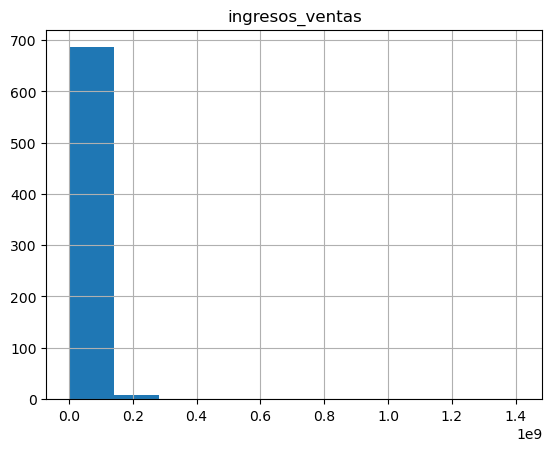

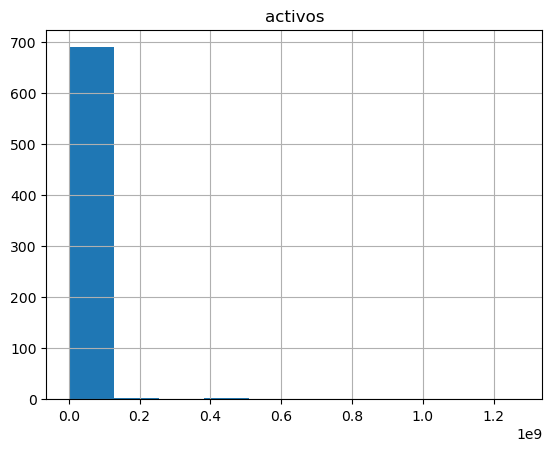

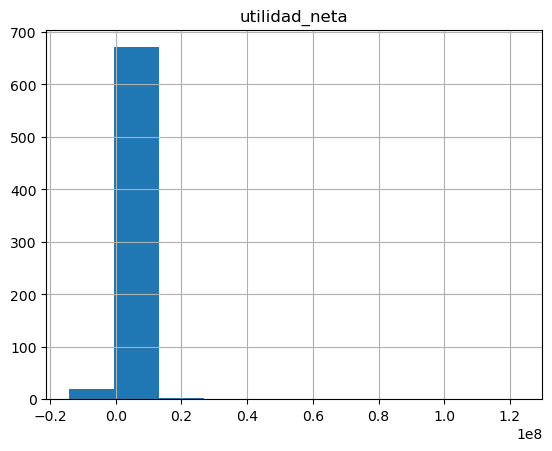

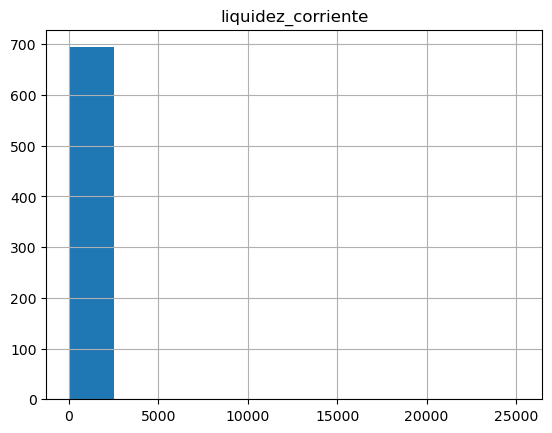

In [47]:
for variable in range(len(variables_cuantitativas)):
    datos_companias.hist(variables_cuantitativas[variable])

Text(0.5, 1.0, 'Ingresos por Ventas')

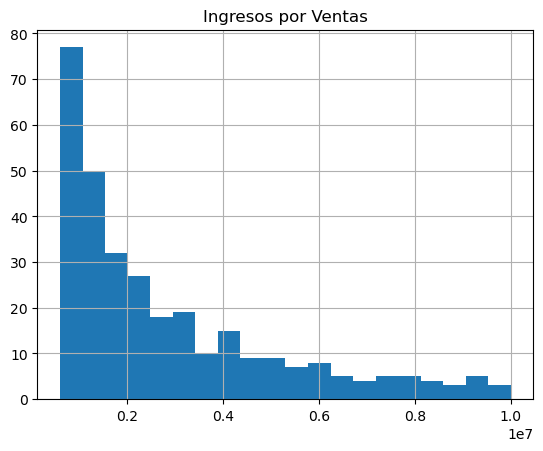

In [48]:
datos_companias["ingresos_ventas"].hist(bins = 20, range = (600000, 10000000))
plt.title('Ingresos por Ventas')

Text(0.5, 1.0, 'Activos')

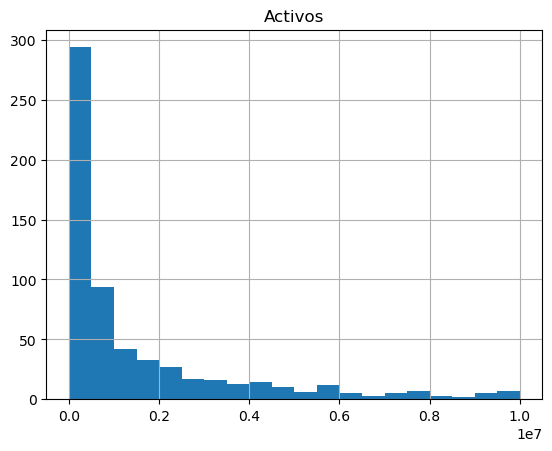

In [49]:
datos_companias["activos"].hist(bins = 20, range = (0, 10000000))
plt.title('Activos')

Text(0.5, 1.0, 'utilidad_neta')

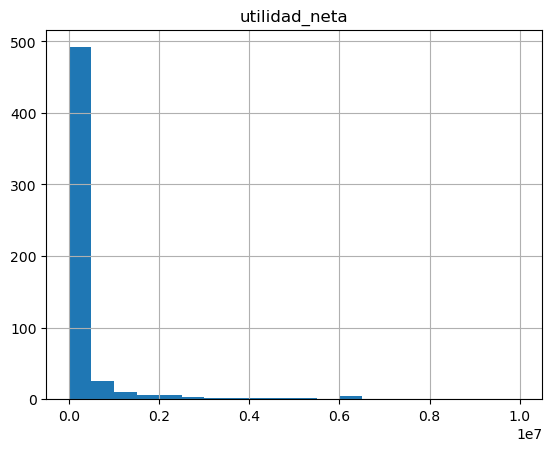

In [50]:
datos_companias["utilidad_neta"].hist(bins = 20, range = (0, 10000000))
plt.title('utilidad_neta')

Text(0.5, 1.0, 'liquidez_corriente')

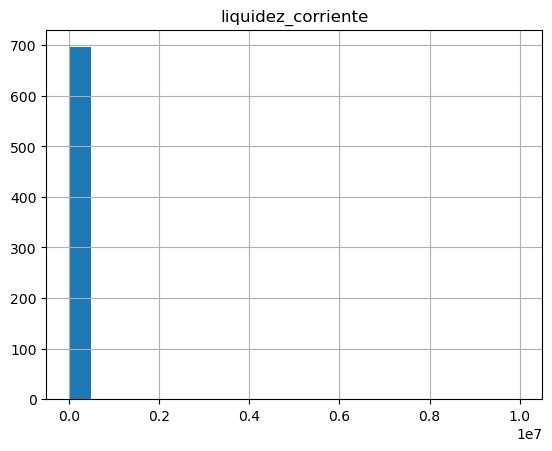

In [51]:
datos_companias["liquidez_corriente"].hist(bins = 20, range = (0, 10000000))
plt.title('liquidez_corriente')

**Diagramas de Caja**

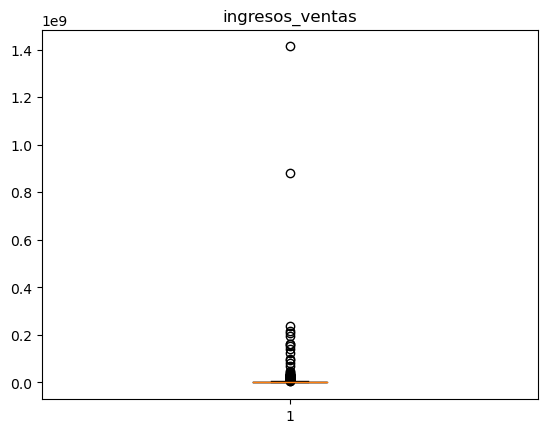

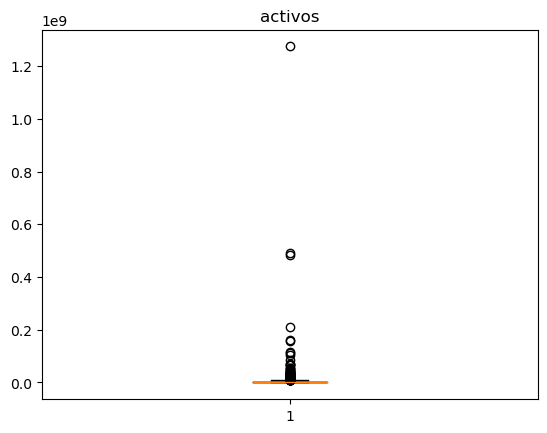

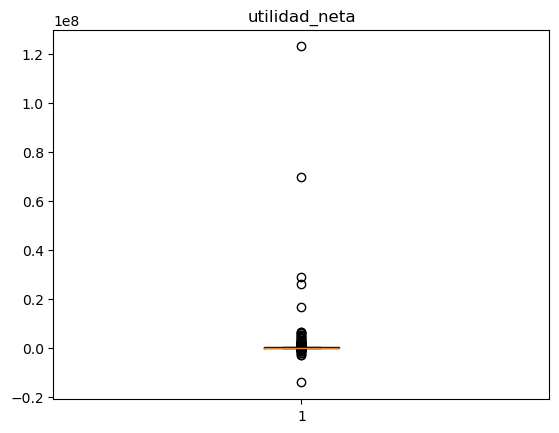

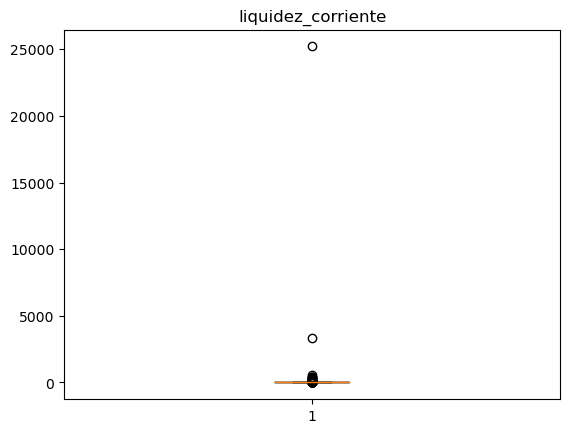

In [52]:
for variable in variables_cuantitativas:
    plt.figure()  
    plt.boxplot(datos_companias[variable])
    plt.title(variable)

Del análisis de los histogramas y digramas de caja, se concluye que existe un gran desbalance en términos económicos entre las empresas. En este caso, los datos anómalos no conviene retirarlos pues correspoden a las empresas más grandes, con quienes será más fácil trabajar.

Finalmente, es probable que las variables hasta ahora seleccionadas se encuentren correlacionadas. En este caso, se deberían eliminar variables que no aporten información adicional.Se empezará por eliminar las variables que sabemos tienen una correlación directa.

Adicionalmente, se designran con el valor de "0" a las empresas no certificadas. Los datos ausentes de las variables cuantitativas seleccionadas se rellenaran con la mediana.

**Selección de variables**

In [53]:
# Selección de variables
datos_companias = datos_companias[['ingresos_ventas', 'activos', 
                          'utilidad_neta', 'liquidez_corriente', 'ruc', 'certificada']]

datos_companias = datos_companias.reset_index(drop=True)
datos_companias.head(5)

,ingresos_ventas,activos,utilidad_neta,liquidez_corriente,ruc,certificada
0,437050.25,377747.45,50.25,1.080,0992653817001,0.0
1,1812205.25,951439.00,44958.66,0.250,0791742293001,0.0
2,51383.90,153789.25,11699.50,1.065,0190150011001,0.0
3,59548.71,3788226.80,11699.50,1.065,0990325561001,0.0
4,5065330.46,7294183.54,260322.73,0.670,0190089037001,0.0


In [54]:
datos_companias.describe()

,ingresos_ventas,activos,utilidad_neta,liquidez_corriente,certificada
count,6.960000e+02,6.960000e+02,6.960000e+02,696.000000,696.000000
mean,9.229476e+06,8.517106e+06,5.187288e+05,48.698463,0.028736
std,6.649810e+07,5.691869e+07,5.653778e+06,964.254040,0.167183
min,4.000000e-02,4.000000e+02,-1.426246e+07,0.000000,0.000000
25%,1.976099e+05,2.357890e+05,9.196250e+01,0.690000,0.000000
50%,8.493644e+05,7.343904e+05,1.169950e+04,1.065000,0.000000
75%,3.261578e+06,3.471327e+06,7.145226e+04,1.740000,0.000000
max,1.412874e+09,1.274285e+09,1.229923e+08,25206.340000,1.000000


In [55]:
# Guarda los datos de las companias seleccionadas para el análisis
datos_companias.to_csv('datos_companias.csv', index=False)  

In [56]:
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ingresos_ventas     696 non-null    float64
 1   activos             696 non-null    float64
 2   utilidad_neta       696 non-null    float64
 3   liquidez_corriente  696 non-null    float64
 4   ruc                 696 non-null    object 
 5   certificada         696 non-null    float64
dtypes: float64(5), object(1)
memory usage: 32.8+ KB


### 4.1 Conclusiones Intermedias Pre-Procesamiento de datos <a id="4.1"></a>

- Existió un conflicto de integridad de datos con los números de RUC que empezaban con cero. Esto requirió un proceso de homgeneización.

- Existen 18627 empresas del sector de Acuacultrua en general CIIU: A032. Para ser más precisos en las comparaciones, se aplicó nuevamente el filtro exclusivamente para el sector camaronero. Esto debido a que las empresas certificadas por el ASC son únicamente camaroneras. Aplicando este segundo filtro se obtuvieron 17130 empresas. Es decir, aproximadamente el 91% de las empresas que pertenecen al sector de Acuicultura del Ecuador corresponden a camaroneras.

- Se levantó una base de datos 29 empresas del sector de acuicultura en Ecuador, certificadas por el "Aquaculture Stwewarship Council" (ASC). Cabe señalar que el levantamiento de datos fue manual a partir de los datos de la aplicación ARCGis Web de la ASC, y que podrían existir más. No obstante, la base generada es más consistente y completa que otras también disponibles en línea. También se debe mencionar que la discrepancia entre la base levantada y la totalidad de datos es probablemente mínima.   

- El sector de acuicultura  cuenta con 18,627 empresas en la base de datos de la Superintendencia de Compañías de Ecuador para el año 2023. En ese sentido, se tuvo que definir un parámetro económico-financiero para filtrar a las empresas en capacidad de recibir préstamos. El criterio escogido fue el de índice de liquidez corriente mayor o igual a uno. Con este parámetro la base se limita a 696 empresas. De las empresas certificads por la ASC, 12 pasan el filtro de capacidad económica-financiera. En en base a los datos de estas 12 empresas se correrá el algoritmo de "k nearest neighors".

- Más del 50 % de empresas de acuicultura no registraron ingresos por ventas en el año 2023. En contraste, a partir del percentil 75 las empresas recibieron más de 5 millones de dólares por ingresos en este mismo año. 


## 5. MODELACIÓN <a id="5"></a>

In [59]:
# Escalado de datos

feature_names = ['ingresos_ventas', 'activos', 
                          'utilidad_neta', 'liquidez_corriente']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(datos_companias[feature_names].to_numpy())

datos_companias_escalado = datos_companias.copy()
datos_companias_escalado.loc[:, feature_names] = transformer_mas.transform(datos_companias[feature_names].to_numpy())

In [60]:
datos_companias_escalado.sample(5)

,ingresos_ventas,activos,utilidad_neta,liquidez_corriente,ruc,certificada
586,6.578710e-05,0.000041,0.000007,0.000041,0791825059001,0.0
692,6.036708e-05,0.000027,0.000062,0.000124,0791840961001,0.0
150,1.225196e-04,0.000399,-0.002268,0.000034,0791740622001,0.0
646,9.710701e-05,0.000004,0.000024,0.003577,0791833760001,0.0
259,9.165713e-07,0.001364,0.000000,0.012752,0992590211001,0.0


In [61]:
# Función que devuelve los vecinos más cercanos 

def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    
    :param k: el número de vecinos cercanos a calcular
    :param n: número de usuario para el que se buscan los vecinos más cercanos 
    """
    
    # Crea la instancia del algoritmo de clasificación
    # Define los parámetros del algoritmo de clasificación en donde:
        # "algorithm" es el algoritmo usado  para calcular los vecinos cercanos (fijado en "auto" para que la función escoja el, mejor algoritmo en base al ajuste de los datos usando el método "fit")
        # "metric" corresponde a la métrica de distancia
        # Ajusta el algoritmo a los datos de entrada provistos usando el método fit
    
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto', metric=metric).fit(df) 
                                                                                      
    # Se aplica el método "kneighbors" al modelo para obtener los vecinos (en este caso clientes) más cercanos  
    # Los parámetros de método son:
        #"X", en este caso "[df.iloc[n]]" que seleciona el punto de consulta (en este caso cliente)                                                                                             
        #"return_distance=True" se establece que método devuelva las distancias que determinaron la selección de los vecinos                                                                                        
    # El método devuelve dos resultados:                                                                                          
        #"neigh_dist" en este caso "nbrs_distances", que representa una matriz con las distancias del punto de consulta (cliente) a los vecinos cercanos                                                                                 
        #"neigh_ind" en este caso "nbrs_indices", que representa los índices del "dataframe" de los vecinos cercanos al punto de consulta (cliente)                                                                                                                                                             
                                                                                        
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n]], k, return_distance=True) 
    
    
    #Concatena los resultados de método "kneighbors" para devolver un "dataframe" de respuesta
    #Extrae todos los datos del vecino cercano seleccionado (en base al método "kneighbors") de acuerdo al valor de su índice. Estos datos se extraen del "dataframe" original "df"
    #Añade la columna de distancia al "dataframe" de respuesta, suando los siguientes parámetros: 
        #índice del vecino cercano (cliente) "index=nbrs_indices[0]"
        #matriz transpuesta de los resultados de las distancias de los vecinos cercanos
        #nombre de la nueva colunma "columns=['distance']"
        
    df_res = pd.concat([ 
        df.iloc[nbrs_indices[0]],   
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance']) 
        ], axis=1)                                                                      
                                                                                                                                                                                
    return df_res

In [62]:
# Registros de compañías certificadas
datos_companias_certificadas = datos_companias[datos_companias["certificada"] == 1] 
datos_companias_certificadas

,ingresos_ventas,activos,utilidad_neta,liquidez_corriente,ruc,certificada
5,1.888872e+07,1.050026e+07,1.136028e+06,2.29,0990171092001,1.0
16,2.372973e+08,1.561216e+08,1.914161e+06,0.80,0990553963001,1.0
18,1.291687e+07,9.155118e+06,1.557798e+06,3.29,0990555575001,1.0
23,1.412874e+09,1.274285e+09,1.229923e+08,1.55,0991257721001,1.0
24,1.934767e+08,1.612697e+08,2.863518e+07,1.13,0990576459001,1.0
32,1.271823e+07,1.092104e+07,-1.000988e+05,1.99,0790050487001,1.0
42,2.041376e+07,4.792160e+06,1.199193e+05,0.79,0990666253001,1.0
45,2.238434e+07,3.117912e+07,1.744677e+06,1.21,0990666407001,1.0
48,8.814401e+08,4.892768e+08,6.972812e+07,1.43,0990608504001,1.0
51,3.785528e+07,5.084220e+07,2.919455e+06,2.75,0990621705001,1.0


In [63]:
# Datos escalados con distancia "Euclidiana"
get_knn(datos_companias_escalado, 1, 5, "euclidean")

,ingresos_ventas,activos,utilidad_neta,liquidez_corriente,ruc,certificada,distance
1,0.001283,0.000747,0.000366,0.000010,0791742293001,0.0,0.0
134,0.001146,0.000650,-0.000521,0.000066,0791741920001,0.0,373000.0
33,0.002870,0.002782,0.001373,0.000018,0791742684001,0.0,391000.0
147,0.000329,0.000185,-0.000888,0.000035,0791741815001,0.0,478000.0
114,0.000939,0.001957,0.000386,0.000032,0791741726001,0.0,567000.0


In [64]:
# Datos escalados con distancia "Euclidiana"
get_knn(datos_companias_escalado, 7, 5, "euclidean")

,ingresos_ventas,activos,utilidad_neta,liquidez_corriente,ruc,certificada,distance
7,0.002692,0.002689,1.443558e-03,0.000273,0992659351001,0.0,0.0
38,0.004404,0.006400,9.517167e-04,0.000017,0992664436001,0.0,5085000.0
40,0.021421,0.026418,1.887771e-02,0.000035,0992664630001,0.0,5279000.0
0,0.000309,0.000296,4.085623e-07,0.000043,0992653817001,0.0,5534000.0
86,0.003915,0.005238,-1.917047e-02,0.000029,0992664967001,0.0,5616000.0


### 5.1 Conclusiones Intermedias Modelación <a id="5.1"></a>

- Como se planificó, el algoritmo "k nearest neighbors" es capaz de identificar las empresas que más se asemejan en términos económico-financieros a las empresas certificadas por la ASC (y que pasan el filtro para ser sujetos de crédito). Esto en función de las variables seleccionadas por criterio experto. 

In [65]:
# Función que devuelve la base de prospectos ampliada
def dataframe_de_resultados(df1, df2, func, param1, param2):

    resultados = []
    for index in df1.index:
        resultado = func(df2, index, param1, param2) 
        resultados.append(resultado)
    
    # Concatena los resultados en un nuevo DataFrame
    nuevo_df = pd.concat(resultados)
    
    # Elimina los duplicados
    nuevo_df = nuevo_df.drop_duplicates(subset='ruc', keep='first')
    
    # Elimina los datos de las empresas certificadas
    
    nuevo_df = nuevo_df[nuevo_df.certificada == 0]
    
    # Devuelve los ceros a la columna de RUC
    
    nuevo_df['ruc'] = nuevo_df['ruc'].map(str)
    #nuevo_df['ruc'] = nuevo_df['ruc'].apply(lambda x: '0' + x if x[0] != '1' else x)
    
    ruc = nuevo_df['ruc']
    
    # Realiza un "join" para obtener los datos completos de las empresas
    mask = compania['ruc'].isin(ruc)
    df_final = compania[mask]
    df_final = df_final.drop(["expediente", "pro_codigo", "Unnamed: 6", "tipo"], axis=1)
    
    return df_final


In [66]:
# Llamado a la función que devuelve la base de prospectos ampliada
resultados = dataframe_de_resultados(datos_companias_certificadas, datos_companias_escalado, get_knn, 10, "euclidean")
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 6702 to 217995
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ruc        118 non-null    object
 1   nombre     118 non-null    object
 2   provincia  118 non-null    object
dtypes: object(3)
memory usage: 3.7+ KB


In [67]:
resultados

,ruc,nombre,provincia
6702,0990325561001,ACUESPECIES SA,GUAYAS ...
7761,0990002290001,INDUSTRIA PESQUERA CAPRICORNIO SA IPECASA,GUAYAS ...
9914,0990442991001,CRIMASA CRIADEROS DE MARISCOS SA,GUAYAS ...
10358,0790048741001,INDUSTRIAS Y CULTIVOS EL CAMARON SA ICCSA,GUAYAS ...
10670,0990353077001,GARZAL SA,GUAYAS ...
...,...,...,...
217076,0993188816001,I&V BIO S.A.,GUAYAS ...
217249,0993192155001,SKRETTING ARC ECUADOR S.A.,GUAYAS ...
217272,0993193453001,AERO WANG AERWANG C.LTDA.,EL ORO ...
217804,0993183857001,ENGUNGAMAR S.A.,GUAYAS ...


In [68]:
resultados.to_csv('base_de_prospectos_ampliada.csv', index=False)  

## 6. CONCLUSIONES FINALES Y LIMITACIONES <a id="6"></a>

### 6.1 Conclusiones finales <a id="6.1"></a>

- Se levantó una base de datos 29 empresas del sector de acuicultura en Ecuador, certificadas por el "Aquaculture Stwewarship Council" (ASC). Por otra parte, el sector de acuicultura  cuenta con 18,627 empresas en la base de datos de la Superintendencia de Compañías de Ecuador para el año 2023. El 92 % de estas empresas son camaroneras.  En ese sentido, se tuvo que definir un parámetro económico-financiero para filtrar a las empresas en capacidad de recibir préstamos. Se escogieron cuatro criterios en los cuales las empresas debían reportar valores mayores a cero: 1) ingresos por ventas, 2) número de empleados, número de activos, patrimonio. Con estos parámetros la base se limita a 696 empresas. De las empresas certificads por la ASC, 20 pasan estos filtros económico-financieros. En base a los datos de estas 20 empresas se corrió el algoritmo de "k nearest neighbors". Cabe señalar que estas 20 empresas son los prospectos principales al estar certificadas y ser potenciales sujetos de crédito.  

- Como se planificó, el algoritmo "k nearest neighbors" es capaz de identificar las empresas que más se asemejan en términos económico-financieros a las empresas certificadas por la ASC (y que pasan el filtro para ser potenciales sujetos de crédito). Esto en función de las variables seleccionadas por criterio experto. Seleccionando un valor k= 10 por cada empresas certificad por la ASC y que es sujeto de crédito, el algoritmo devuleve una base de 118 nuevos prospectos.  

### 6.2 Limitaciones <a id="6.2"></a>

- Falta de acceso a bases de datos ambientales empresariales: Un proyecto a gran escala necesitará necesariamente la generación de bases de datos ambientales empresarias a nivel nacional. O en su defecto, la inversión para el acceso a APIs internacionales que permitan  hacer una comparación. En ese sentido, los resultados resultarían ser una aproximación que requerirá una investigación personalizada de cada prospecto. 

- Falta de datos etiquetados: En virtud de que no se cuenta con información de que empresas ya han recibido préstamos azules, no se puede realizar una modelación predictiva supervisada. En ese sentido se optó por aplicar “K nearest neiborhs” para buscar empresas similares con los pocos datos etiquetados con los que se cuentan. No obstante, los resutlados podrían ser imprecisos. Por ejemplo, se podrían identificar empresas que ya hayan recibido préstamos verdes pero que no lo sepamos por falta de cruce de información entre instituciones financieras.